In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from file_readers.CriminalActFileReader import CriminalActFileReader
from file_readers.LocationFileReader import LocationFileReader
from file_readers.PropertyFileReader import PropertyFileReader
from file_readers.OffenseFileReader import OffenseFileReader
from file_readers.IncidentFileReader import IncidentFileReader

property_file_reader = PropertyFileReader()
offense_file_reader = OffenseFileReader()
incident_file_reader = IncidentFileReader()
location_file_reader = LocationFileReader()
criminal_act_file_reader = CriminalActFileReader()

In [2]:
incident = incident_file_reader.get_incident_df()
incident.head()

,data_year,agency_id,incident_id,nibrs_month_id,cargo_theft_flag,submission_date,incident_date,report_date_flag,incident_hour,cleared_except_id,cleared_except_date,incident_status,data_home,orig_format,did
0,2023,937,165629217,44294843,f,2023-02-02 15:45:57.626,2023-01-01,f,0.0,6,NaN,WARNINGS,NaN,X,172557926
1,2023,937,168896599,44294843,f,2023-03-30 02:45:11.651,2023-01-01,f,3.0,6,NaN,ACCEPTED,NaN,X,181397410
2,2023,937,166286996,44294843,f,2023-02-13 03:39:31.498,2023-01-01,f,4.0,6,NaN,ACCEPTED,NaN,X,174464262
3,2023,937,166286997,44294843,f,2023-02-13 03:39:32.566,2023-01-01,f,4.0,6,NaN,ACCEPTED,NaN,X,174464265
4,2023,937,166286998,44294843,f,2023-02-13 03:39:33.49,2023-01-01,f,5.0,6,NaN,ACCEPTED,NaN,X,174464268


In [3]:
property = property_file_reader.get_property_df()
property.head()

,data_year,property_id,incident_id,prop_loss_id,stolen_count,recovered_count,date_recovered,nibrs_prop_desc_id,prop_desc_id,property_value,prop_desc_code,prop_desc_name,prop_loss_desc,prop_loss_name
73757,2023.0,162718431.0,165630349.0,6.0,NaN,NaN,NaN,NaN,11.0,2.0,11.0,Drug Equipment,Seized (to impound property that was not previ...,Seized
73764,2023.0,163287413.0,166287040.0,6.0,NaN,NaN,NaN,NaN,11.0,2.0,11.0,Drug Equipment,Seized (to impound property that was not previ...,Seized
73776,2023.0,164568031.0,167756518.0,6.0,NaN,NaN,NaN,NaN,11.0,5.0,11.0,Drug Equipment,Seized (to impound property that was not previ...,Seized
73789,2023.0,164242875.0,167374455.0,6.0,NaN,NaN,NaN,NaN,11.0,2.0,11.0,Drug Equipment,Seized (to impound property that was not previ...,Seized
73799,2023.0,164242944.0,167374530.0,6.0,NaN,NaN,NaN,NaN,11.0,2.0,11.0,Drug Equipment,Seized (to impound property that was not previ...,Seized


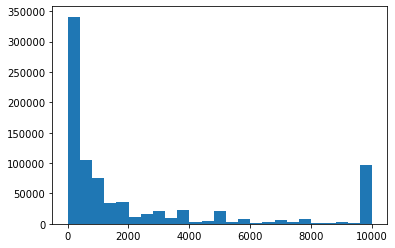

In [4]:
# HISTOGRAM OF PROPERTY VALUES
MAX_PROPERTY_VALUE_FOR_HISTOGRAM = 10000
property_values = property["property_value"].values
property_values = [min(MAX_PROPERTY_VALUE_FOR_HISTOGRAM, value) for value in property_values]

plt.hist(property_values, bins=25);

In [5]:
# LIST OF MEAN PROPERTY VALUES FOR EACH CATEGORY OF PROPERTY
property_grouped = property.groupby("prop_desc_name")
property_grouped_sort_by_mean = property_grouped["property_value"].mean().sort_values(ascending=False)
for key, value in property_grouped_sort_by_mean.items():
    print(key, int(value))

Aircraft 89726
Building Materials 19787
Watercraft 19523
Buses 19222
Collections/ Collectibles 17662
Negotiable Instruments 15324
Trucks 15286
Jewelry/ Precious Metals 14860
Recreational Vehicles 13856
Trailers 13482
Industrial Equipment 13384
Automobile 12519
Structure/ Single dwelling 12294
Farm Equipment 12193
Money 11960
Other Motor Vehicles 10121
Drugs/ Narcotics 8459
Metals, Non-Precious 8300
Aircraft Parts/ Accessories 6439
Structure/ Public 6434
Crops 6408
Livestock 5710
Structure/ Other 4448
Watercraft Equipment/ Parts/ Accessories 4443
Structure/ Other commercial 4335
Structure/ Other residence 4005
Structure/ Other industrial 3971
Medical/ Medical Lab Equipment 3512
Photographic/ Optical Equipment 3294
Pets 3246
Structure/ Storage 3180
Other 2995
Tools 2935
Musical Instruments 2824
Clothes/ Furs 2422
Computer Hard/ Software 2355
Recordings 2182
Chemicals 2120
Lawn/ Yard/ Garden Equipment 2046
Logging Equipment 1827
Vehicle Parts 1731
Law Enforcement Equipment 1563
Bicycles 1

In [6]:
# 25 MOST COSTLY INCIDENTS
dataframe = property_file_reader.get_property_df()
dataframe = offense_file_reader.merge_offense_to_df(dataframe)
dataframe = location_file_reader.merge_location_to_df(dataframe)
dataframe = criminal_act_file_reader.merge_criminal_act_to_df(dataframe)
dataframe = dataframe.sort_values(by="property_value", ascending=False)
dataframe.head(n=25)

,data_year,property_id,incident_id,prop_loss_id,stolen_count,recovered_count,date_recovered,nibrs_prop_desc_id,prop_desc_id,property_value,...,offense_code,offense_group,offense_id,offense_name,location_code,location_name,criminal_act_code,criminal_act_desc,criminal_act_id,criminal_act_name
1534462,2023.0,181193892.0,187008341.0,7.0,NaN,NaN,NaN,NaN,42.0,124465227.0,...,23H,A,222320259.0,All Other Larceny,6.0,Construction Site,NaN,NaN,NaN,NaN
788195,2023.0,171126366.0,175335063.0,7.0,NaN,NaN,NaN,NaN,6.0,73455869.0,...,220,A,208897124.0,Burglary/Breaking & Entering,5.0,Commercial/Office Building,NaN,NaN,NaN,NaN
1446578,2023.0,172105935.0,176448290.0,7.0,NaN,NaN,NaN,NaN,63.0,66000000.0,...,270,A,210187549.0,Embezzlement,14.0,Hotel/Motel/Etc.,NaN,NaN,NaN,NaN
792605,2023.0,175894945.0,180899008.0,3.0,NaN,NaN,NaN,NaN,20.0,54158500.0,...,250,A,215290175.0,Counterfeiting/Forgery,5.0,Commercial/Office Building,O,Operating/Promoting/Assisting/Abetting,5.0,Operating/Promoting/Assisting/Abetting
1479153,2023.0,172579147.0,177001032.0,7.0,NaN,NaN,NaN,NaN,45.0,23647110.0,...,290,A,210823320.0,Destruction/Damage/Vandalism of Property,19.0,Rental Storage Facility,NaN,NaN,NaN,NaN
1479150,2023.0,172579147.0,177001032.0,7.0,NaN,NaN,NaN,NaN,45.0,23647110.0,...,220,A,210823319.0,Burglary/Breaking & Entering,19.0,Rental Storage Facility,NaN,NaN,NaN,NaN
672694,2023.0,176837587.0,181986121.0,2.0,NaN,NaN,NaN,NaN,35.0,10010000.0,...,200,A,216540624.0,Arson,25.0,Other/Unknown,NaN,NaN,NaN,NaN
1133177,2023.0,181372080.0,187212229.0,3.0,NaN,NaN,NaN,NaN,20.0,9999999.0,...,250,A,222555098.0,Counterfeiting/Forgery,20.0,Residence/Home,B,Buying/Receiving,1.0,Buying/Receiving
1128405,2023.0,171374409.0,175613126.0,7.0,NaN,NaN,NaN,NaN,29.0,8800000.0,...,26A,A,209222449.0,False Pretenses/Swindle/Confidence Game,20.0,Residence/Home,NaN,NaN,NaN,NaN
783667,2023.0,179214879.0,184723856.0,7.0,NaN,NaN,NaN,NaN,20.0,8500000.0,...,23H,A,219684905.0,All Other Larceny,5.0,Commercial/Office Building,NaN,NaN,NaN,NaN
